In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels
import statsmodels.sandbox.stats.multicomp

%matplotlib inline

Two samples using distibutions with the same mean

In [2]:
data_fst = np.random.normal(10, 10, size=100)
data_snd = np.random.normal(10, 1, size=100)

Sample means are different, of course.

In [4]:
print(data_fst.mean())
print(data_snd.mean())

10.761989474125148
10.203698320325564


Howeer, if we use slightly different means, than the sample means can also look similar.

In [6]:
data_fst = np.random.normal(10.5, 10, size=100)
data_snd = np.random.normal(10, 1, size=100)

print(data_fst.mean())
print(data_snd.mean())

10.65599955444816
10.025562778665702


# Central Limit Theorem

### - Use the Central Limit Theorem to calculate the confidence interval for the mean value

### CLT:
### $\xi_1, \xi_2, \dots$ - I.I.D. with variance $D \xi_1$ mean $E \xi_1$, then

$\sqrt{\frac{n}{D \xi_1}} \left(\frac{\sum\limits_{i=1}^{n} \xi_i}{n} - E \xi_1\right) \to_{n \to \infty} \mathcal{N}(0, 1)$ 

### Hense, with large $n$ the variate $\frac{\sum\limits_{i=1}^{n} \xi_i}{n}$ is distributed as $\mathcal{N}(E \xi_1, \frac{D \xi_1}{n})$

### If we know $D \xi_1$, we can calculate $E \xi_1$:
$$
P\left(E \xi_1 \in \left[\frac{\sum\limits_{i=1}^{n} \xi_i}{n} - 1.96 \sqrt{\frac{D \xi_1}{n}}, \frac{\sum\limits_{i=1}^{n} \xi_i}{n} + 1.96 \sqrt{\frac{D \xi_1}{n}}\right]\right) \approx 0.95
$$

### $D \xi_1$ can be estimated from the sample

In [ ]:
def get_95_interval(data, sigma=None):
    mean = data.mean()
    if sigma is None:
        sigma = data.std()
    err = sigma * 1.96 / np.sqrt(len(data))
    return mean - err, mean + err

Let's check if the desired value is contained in the interval



In [ ]:
hits = 0.
count = 0.
true_mean = 10.

for _ in xrange(10000):
    data = np.random.normal(true_mean, 10, size=100)
    lower_bound, upper_bound = get_95_interval(data)
    count += 1
    if lower_bound <= true_mean <= upper_bound:
        hits += 1
        
print hits / count

0.9414


Our estimation is incorrect if we don't have enough data.


In [ ]:
hits = 0.
count = 0.
true_mean = 10.

for _ in xrange(10000):
    data = np.random.normal(true_mean, 10, size=10)
    lower_bound, upper_bound = get_95_interval(data)
    count += 1
    if lower_bound <= true_mean <= upper_bound:
        hits += 1
        
print hits / count

0.9062


In [ ]:
hits = 0.
count = 0.
true_mean = 10.

for _ in xrange(10000):
    data = np.random.normal(true_mean, 10, size=10)
    lower_bound, upper_bound = get_95_interval(data, sigma=10)
    count += 1
    if lower_bound <= true_mean <= upper_bound:
        hits += 1
        
print hits / count

0.9525


In [ ]:
data_fst = np.random.normal(10.5, 10, size=100)
data_snd = np.random.normal(100, 1, size=100)

print get_95_interval(data_fst)
print get_95_interval(data_snd)

(9.6397928647111026, 13.380722746716556)
(99.917890330371719, 100.30837889493928)


In [ ]:
data_fst = np.random.normal(11, 10, size=500)
data_snd = np.random.normal(10, 1, size=100)

print get_95_interval(data_fst)
print get_95_interval(data_snd)

(10.345672341480462, 12.127756386966258)
(9.6132414113707174, 9.9791222624505362)


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)
    
    lower_fst, upper_fst = get_95_interval(data_fst)
    lower_snd, upper_snd = get_95_interval(data_snd)
    
    count += 1
    if not (lower_fst <= lower_snd <= upper_fst or lower_fst <= upper_snd <= upper_fst):
        hits += 1

print hits / count

0.7072


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)
    
    lower_fst, upper_fst = get_95_interval(data_fst)
    lower_snd, upper_snd = get_95_interval(data_snd)
    
    count += 1
    if not (lower_fst <= lower_snd <= upper_fst or lower_fst <= upper_snd <= upper_fst):
        hits += 1

print hits / count

0.0131


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(10.1, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)
    
    lower_fst, upper_fst = get_95_interval(data_fst)
    lower_snd, upper_snd = get_95_interval(data_snd)
    
    count += 1
    if not (lower_fst <= lower_snd <= upper_fst or lower_fst <= upper_snd <= upper_fst):
        hits += 1

print hits / count

0.0189



$\mathcal{N}(a_1, \sigma_1^2) - \mathcal{N}(a_2, \sigma_2^2) \sim \mathcal{N}(a_1 - a_2, \sigma_1^2 + \sigma_2^2)$ 

 $\frac{\sum\limits_{i=1}^{n^1} \xi_i^1}{n^1} - \frac{\sum\limits_{i=1}^{n^2} \xi_i^2}{n^2} \sim \mathcal{N}(E \xi_1^1 - E \xi_1^2, \frac{D \xi_1^1}{n^1} + \frac{D \xi_1^2}{n^2})$

In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)
    
    stat = (
        (data_fst.mean() - data_snd.mean()) 
        / 
        np.sqrt(1. * data_fst.std() ** 2 / len(data_fst) + 1. * data_snd.std() ** 2 / len(data_snd))
    )

    count += 1
    if abs(stat) > 1.96:
        hits += 1

print hits / count

0.8516


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)
    
    stat = (
        (data_fst.mean() - data_snd.mean()) 
        / 
        np.sqrt(1. * data_fst.std() ** 2 / len(data_fst) + 1. * data_snd.std() ** 2 / len(data_snd))
    )
    count += 1
    if abs(stat) > 1.96:
        hits += 1

print hits / count

0.0531


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(10.1, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)
    
    stat = (
        (data_fst.mean() - data_snd.mean()) 
        / 
        np.sqrt(1. * data_fst.std() ** 2 / len(data_fst) + 1. * data_snd.std() ** 2 / len(data_snd))
    )
    count += 1
    if abs(stat) > 1.96:
        hits += 1

print hits / count

0.059


# SciPy tests

In [ ]:
scipy.stats.ttest_ind(data_fst, data_snd).pvalue

0.98828176089022102

In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd).pvalue < 0.05:
        hits += 1

print hits / count

0.002


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd).pvalue < 0.05:
        hits += 1

print hits / count

0.0


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print hits / count

0.854


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print hits / count

0.0516


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print hits / count

0.1035


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print hits / count

0.0002


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(0, 10, size=1000)
    data_snd = np.random.normal(0, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print hits / count

0.0001


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(0, 1, size=1000)
    data_snd = np.random.normal(0, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print hits / count

0.0516


In [ ]:
hits = 0.
count = 0.

for _ in xrange(10000):
    data_fst = np.random.normal(0, 1, size=1000)
    data_snd = np.random.normal(1, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print hits / count

1.0


# About p-value




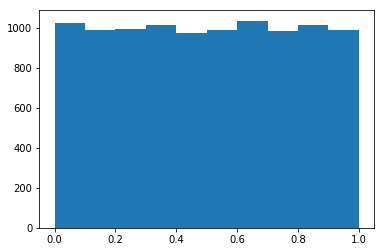

In [ ]:
pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(10, 10, size=100)
    data_snd = np.random.normal(10, 1, size=100)
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
plt.hist(pvalues)
plt.show()

In [ ]:
bad_pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(10, 10, size=100)
    data_snd = np.random.normal(10, 1, size=100)
    bad_pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue < 0.05)
    
print np.mean(bad_pvalues)

0.0533


0.169


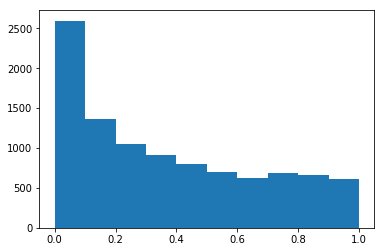

In [ ]:
pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(11, 10, size=100)
    data_snd = np.random.normal(10, 1, size=100)
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
print (np.array(pvalues) < 0.05).mean()
plt.hist(pvalues)
plt.show()

0.51


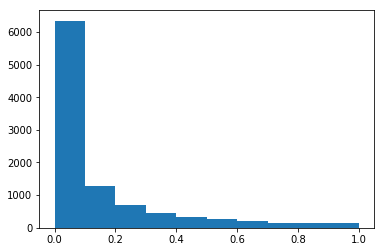

In [ ]:
pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(12, 10, size=100)
    data_snd = np.random.normal(10, 1, size=100)
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
print (np.array(pvalues) < 0.05).mean()
plt.hist(pvalues)
plt.show()

0.882


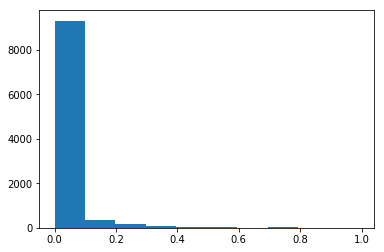

In [ ]:
pvalues = []
for _ in xrange(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=1000)
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
print (np.array(pvalues) < 0.05).mean()
plt.hist(pvalues)
plt.show()

# Bootstap

In [ ]:
def my_bootstrap(data_fst, data_snd, iters=1000, plot=True):
    values = []
    for _ in xrange(iters):
        values.append(
            np.random.choice(data_fst, replace=True, size=len(data_fst)).mean()
            -
            np.random.choice(data_snd, replace=True, size=len(data_snd)).mean()
        )
        
    if plot:
        plt.hist(values, bins=30)
        plt.show()
        
    return np.percentile(values, [2.5, 97.5])

0.901589881196


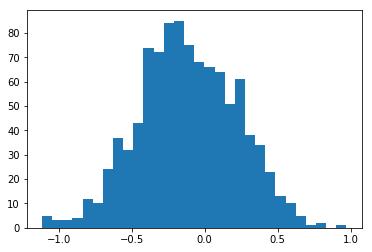

[-0.77868598  0.51807524]


In [ ]:
data_fst = np.random.normal(0, 10, size=1000)
data_snd = np.random.normal(0, 1, size=100)

print scipy.stats.ttest_ind(data_fst, data_snd).pvalue
print my_bootstrap(data_fst, data_snd, iters=1000, plot=True)

0.27757984104


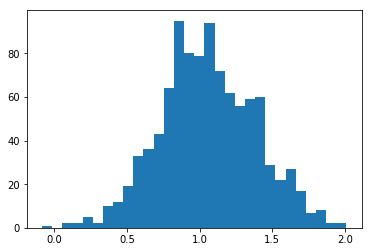

[ 0.42486971  1.70832617]


In [ ]:
data_fst = np.random.normal(1, 10, size=1000)
data_snd = np.random.normal(0, 1, size=100)

print scipy.stats.ttest_ind(data_fst, data_snd).pvalue
print my_bootstrap(data_fst, data_snd, iters=1000, plot=True)

In [ ]:
hits = 0.
count = 0.

for _ in xrange(1000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    lower, upper = my_bootstrap(data_fst, data_snd, plot=False, iters=1000)
    count += 1
    if not (lower < 0 < upper):
        hits += 1

print hits / count

0.845


In [ ]:
hits = 0.
count = 0.

for _ in xrange(1000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    lower, upper = my_bootstrap(data_fst, data_snd, plot=False, iters=1000)
    count += 1
    if not (lower < 0 < upper):
        hits += 1

print hits / count

0.057
